In [6]:
import stlearn as st

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [9]:
data = st.read.file_10x_h5("/home/d.pham/10X/Brain_Sec1_Poste/V1_Mouse_Brain_Sagittal_Posterior_Section_2_filtered_feature_bc_matrix.h5")
data.var_names_make_unique()
st.add.image(adata=data, imgpath="/home/d.pham/10X/Brain_Sec1_Poste/spatial/tissue_lowres_image.png")
st.add.positions(data,position_filepath = "/home/d.pham/10X/Brain_Sec1_Poste/spatial/tissue_positions_list.csv",
                scale_filepath = "/home/d.pham/10X/Brain_Sec1_Poste/spatial/scalefactors_json.json",
                quality="low")
st.pp.filter_genes(data,min_cells=3)
st.pp.normalize_total(data)
st.pp.log1p(data)
st.pp.scale(data)




Trying to set attribute `.uns` of view, copying.


Added tissue image to the object!
filtered out 12716 genes that are detected in less than 3 cells
normalizing counts per cell
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X


In [10]:
st.em.run_pca(data,n_comps=50)
st.pp.neighbors(data,n_neighbors=15)
st.em.run_umap(data)
st.spatial.smooth.disk(data,rates=2,method="median",use_data="X_umap")
st.pp.neighbors(data,n_neighbors=100,use_rep='X_umap_disk')
st.tl.clustering.louvain(data)

PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']
Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 
UMAP is done! Generated in adata.obsm['X_umap'] nad adata.uns['umap']
Disk smoothing function is applied! The new data are stored in adata.obsm["X_diffmap_disk"]
Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 
Applying Louvain clustering ...
Louvain clustering is done! The labels are stored in adata.obs['louvain']


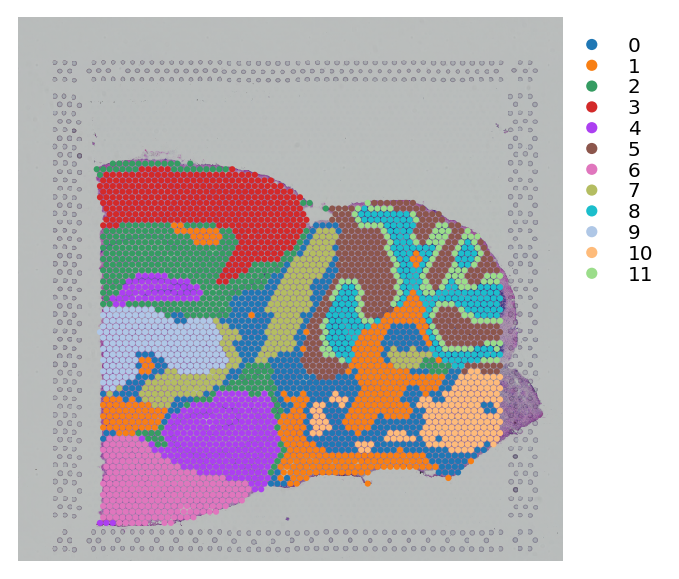

In [11]:
st.pl.cluster_plot(data,use_label="louvain",spot_size=6,data_alpha=1.0)

In [ ]:
#st.spatial.clustering.localization(data,use_labels="louvain")

In [12]:
st.spatial.trajectory.global_level(data,pseudo_root=0)

... storing 'feature_types' as categorical
... storing 'genome' as categorical


PAGA plot:


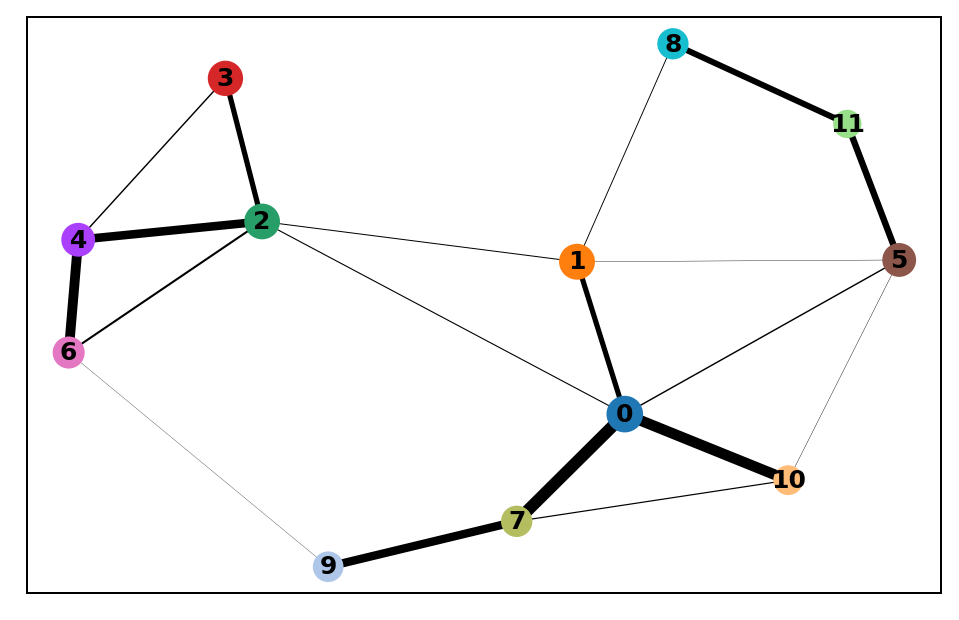

Gene expression (reduced dimension) plot:


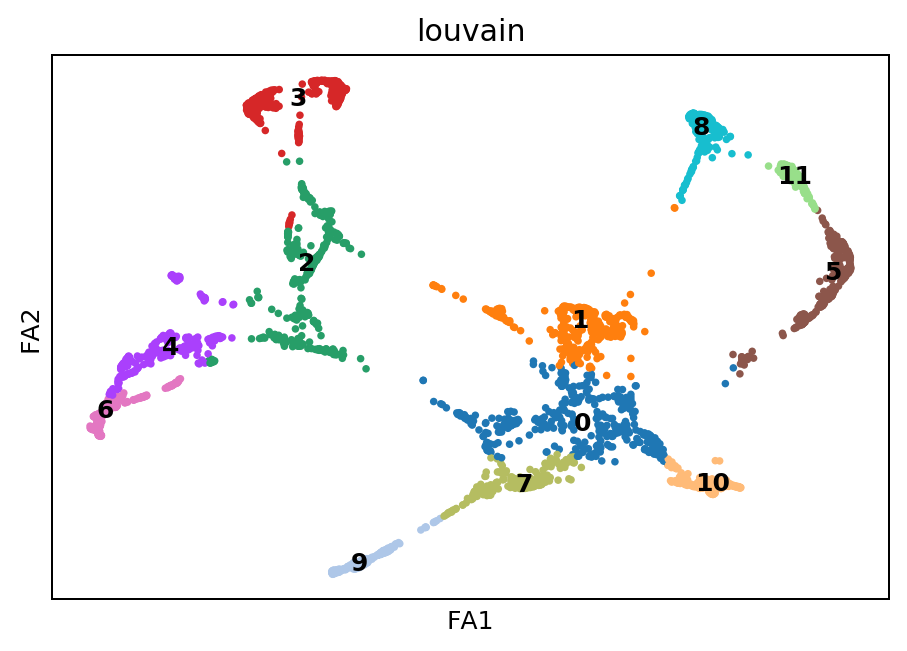

Diffusion pseudotime plot:


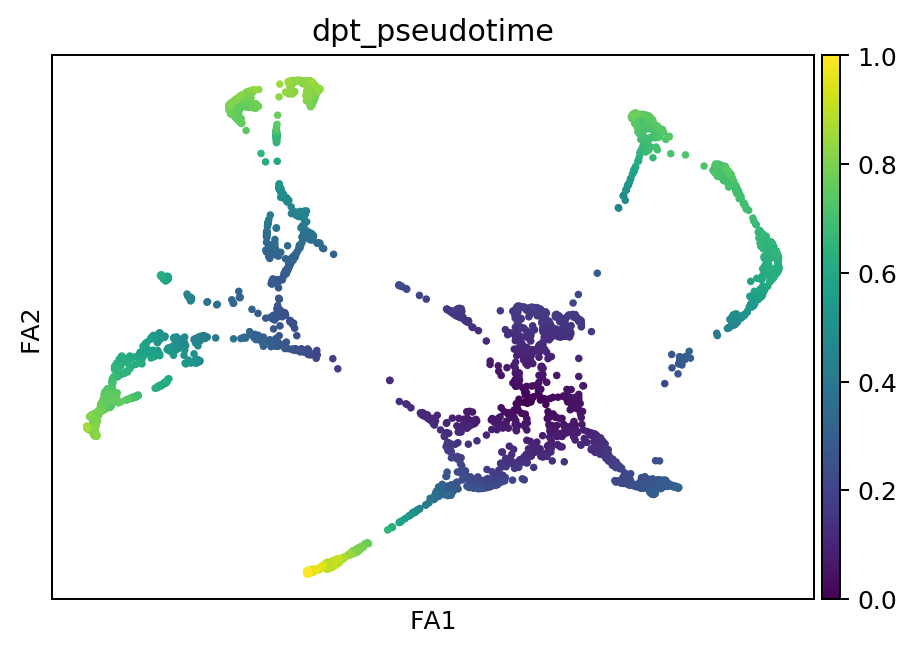

In [13]:
st.pl.non_spatial_plot(data)

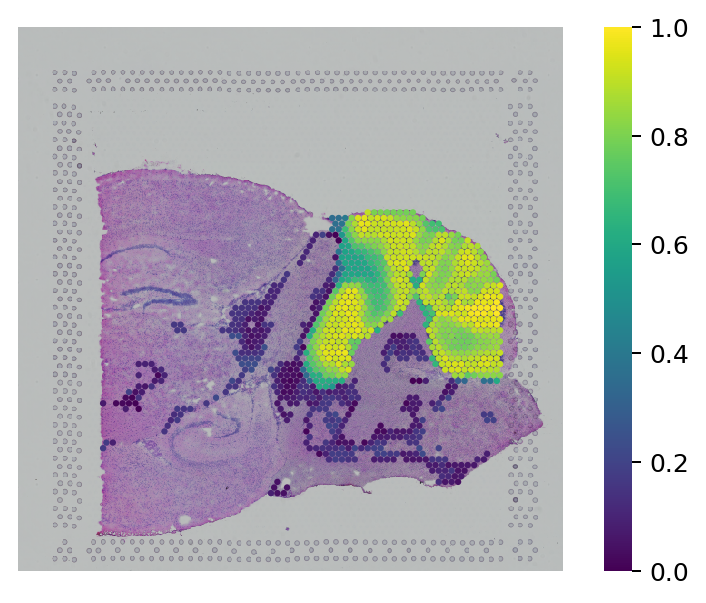

In [9]:
st.pl.trajectory.global_plot(data,list_cluster=[0,8,11,5],edge_alpha=0,node_alpha=0,data_alpha=1,show_graph=False)

In [12]:
list_cluster = [8,11,5]

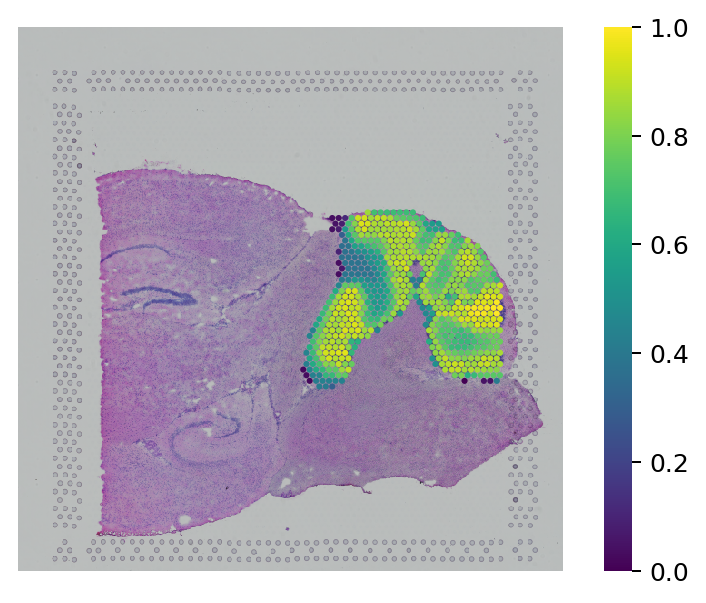

In [13]:
import matplotlib.pyplot as plt
# Get query clusters
command = []
for i in list_cluster:
    command.append("louvain" + ' == "' + str(i) + '"')
tmp = data.obs.query(" or ".join(command))

fig, a = plt.subplots()
dpt = data.obs["dpt_pseudotime"]

vmin = min(dpt)
vmax = max(dpt)
# Plot scatter plot based on pixel of spots
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale = scaler.fit_transform(tmp['dpt_pseudotime'].values.reshape(-1,1)).reshape(-1,1)

plot = a.scatter(tmp["imagecol"], tmp["imagerow"], edgecolor="none", alpha=1,s=6,marker="o",
           vmin=vmin, vmax=vmax,cmap=plt.get_cmap("viridis"),c=scale.reshape(1,-1)[0])



cb = plt.colorbar(plot,cmap="viridis")
cb.outline.set_visible(False)
a.imshow(data.uns["tissue_img"],alpha=1, zorder=-1,)
a.axis('off')
a.set_title
plt.show()

In [156]:
myList = list(scale.reshape(1,-1)[0])
test = sorted(range(len(myList)),key=myList.__getitem__)

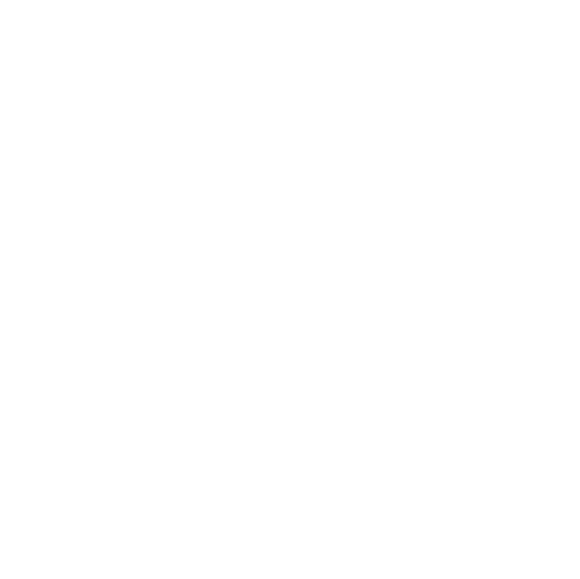

In [163]:
from celluloid import Camera
fig, a = plt.subplots()
camera = Camera(fig)

for j in range(0,len(test)+75,5):
    position = test[:j]
    
    plot = a.scatter(tmp["imagecol"][position], tmp["imagerow"][position], edgecolor="none", alpha=1,s=6,marker="o",
               vmin=vmin, vmax=vmax,cmap=plt.get_cmap("viridis"),c=scale.reshape(1,-1)[0][position])
    a.imshow(data.uns["tissue_img"],alpha=1, zorder=-1,)
    a.axis('off')

    camera.snap()
animation = camera.animate()    

In [161]:
HTML(animation.to_html5_video())

In [219]:
8,11,5,1,0

(8, 11, 5, 1, 0)

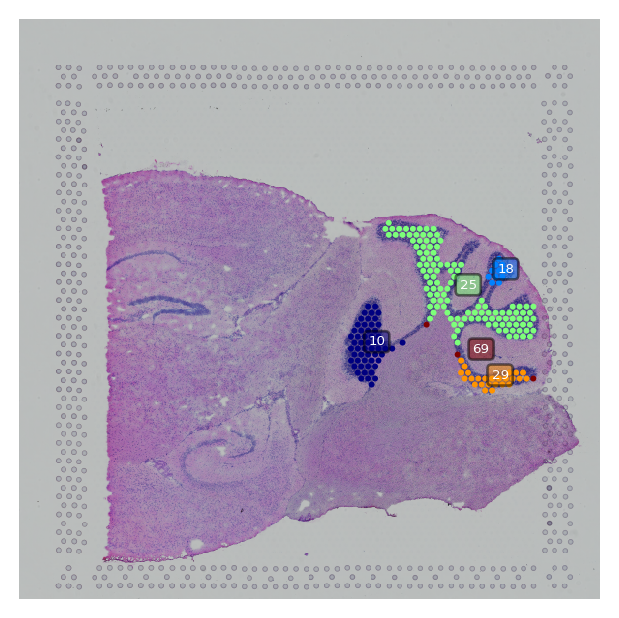

In [14]:
st.pl.subcluster_plot(data,use_label="louvain",cluster=8)

In [ ]:
17,22,9,


In [32]:
sub = [20,16,8,39,37,25,30,17,9,32,38,5,40]

In [16]:
st.spatial.trajectory.sublocal_level(data,use_cluster= "louvain",subcluster=[8,11,5],n_neighbors=100,eps=10)

Start construct trajectory for subcluster [8, 11, 5]
Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 
Applying Louvain clustering ...
Louvain clustering is done! The labels are stored in adata.obs['louvain']


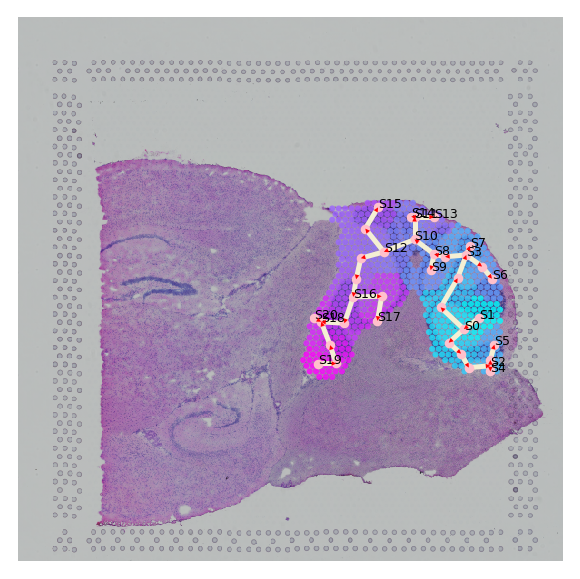

In [18]:
st.pl.trajectory.sublocal_plot(data,subcluster=[8,11,5],route="S1",show_root=True)

In [8]:
from stlearn.external.scanpy.api.tl import diffmap

In [9]:
diffmap(data)

In [10]:
data.obsm["X_diffmap"] = data.obs[["imagerow","imagecol"]].values

In [11]:
st.pp.neighbors(data, n_neighbors=10, use_rep='X_diffmap')

Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 


In [16]:
from stlearn.external.scanpy.api.tl import paga
paga(tmp,groups="sub_cluster_labels",)

... storing 'branch_id' as categorical
... storing 'branch_id_alias' as categorical


In [16]:
from stlearn.external.scanpy.api.tl import dpt

In [13]:
import numpy as np

In [26]:
data.uns['iroot'] = np.flatnonzero(data.obs['sub_cluster_labels']  == '0')[0]

In [27]:
dpt(data)

IndexError: index 2 is out of bounds for axis 1 with size 2

PAGA plot:


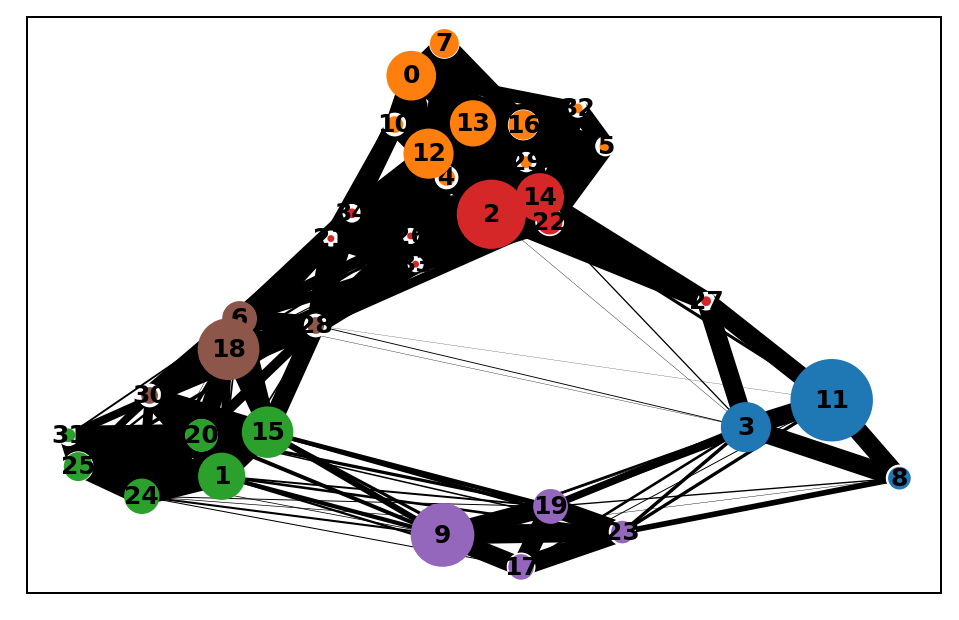

Gene expression (reduced dimension) plot:


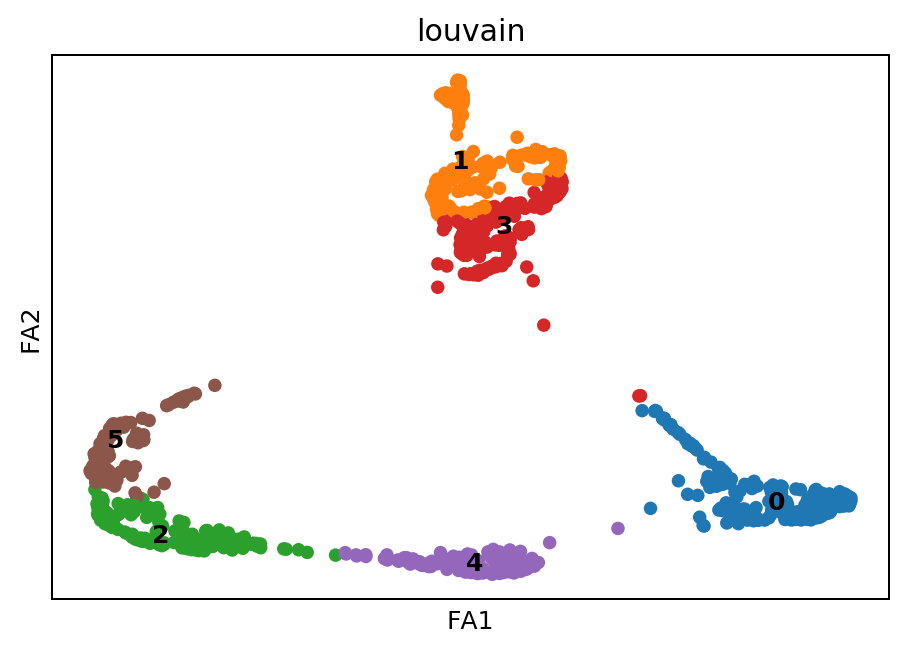

Diffusion pseudotime plot:


KeyError: 'dpt_pseudotime'

In [18]:
st.pl.non_spatial_plot(tmp)

In [39]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [ ]:
import matplotlib.pyplot as plt


In [70]:
from scipy.spatial  import ConvexHull

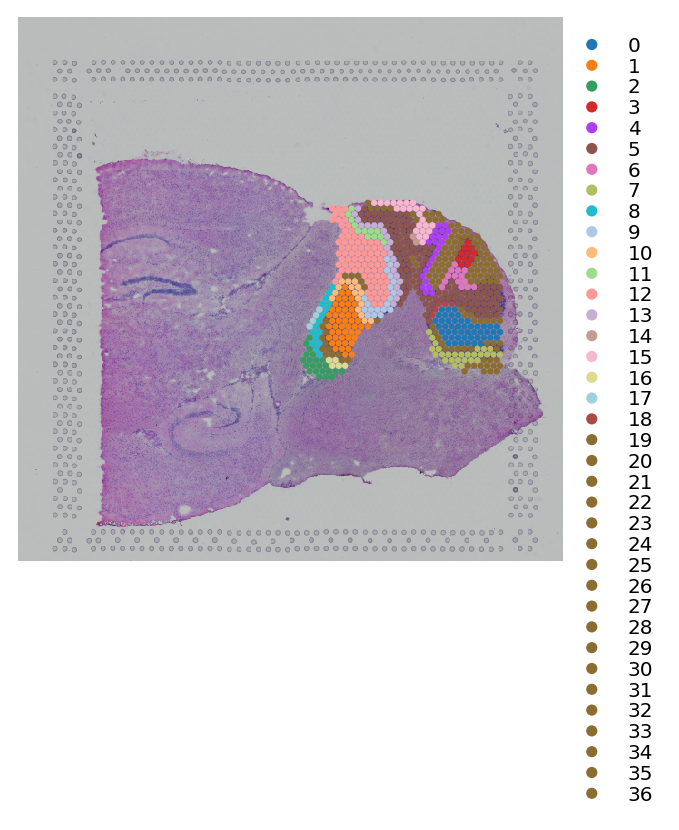

In [181]:
st.pl.cluster_plot(tmp,use_label="sub_cluster_labels")

In [202]:
dict_branches_id = nx.get_edge_attributes(flat_tree,'id')

In [204]:
dict_branches_nodes = nx.get_edge_attributes(flat_tree,'nodes')

In [205]:
dict_branches_nodes

{(0, 15): [15, 0],
 (0, 27): [27, 29, 34, 22, 0],
 (0, 23): [0, 10, 33, 23],
 (2, 18): [18, 36, 2],
 (2, 35): [35, 1, 2],
 (2, 5): [2, 30, 4, 5],
 (5, 24): [24, 3, 5],
 (5, 28): [5, 28],
 (7, 21): [7, 21],
 (9, 35): [9, 35],
 (12, 35): [12, 8, 11, 35],
 (16, 23): [16, 23],
 (17, 27): [17, 20, 27],
 (19, 23): [19, 14, 23],
 (21, 26): [26, 21],
 (21, 28): [21, 6, 28],
 (23, 28): [23, 13, 31, 32, 28],
 (25, 27): [25, 27]}

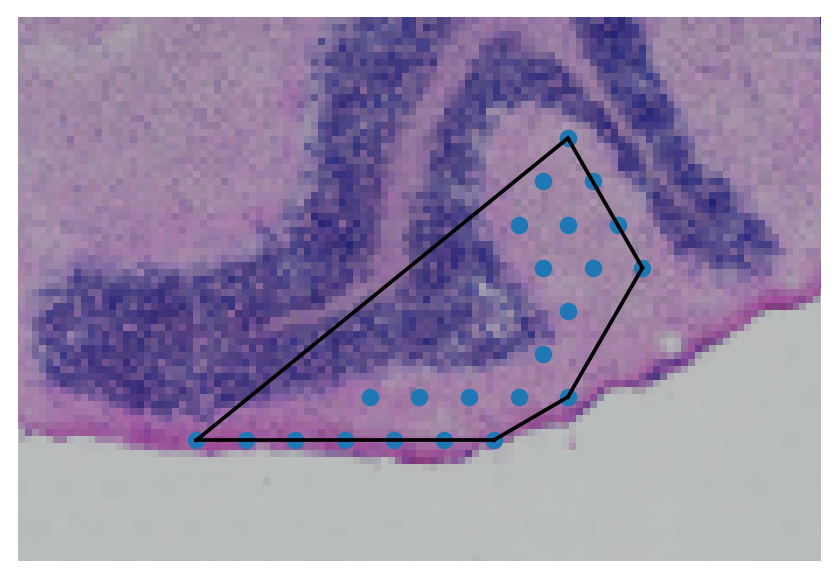

In [206]:
test= tmp.obs[tmp.obs["sub_cluster_labels"]=="15"][["imagecol","imagerow"]].values
hull = ConvexHull(test)

fig, a = plt.subplots()
#a.scatter(tmp.obs["imagecol"],tmp.obs["imagerow"],s=1)

a.plot(hull.points[:,0], hull.points[:,1], 'o')
for simplex in hull.simplices:
    a.plot(hull.points[simplex,0], hull.points[simplex,1], 'k-')
    
_adjust_bounds(a, hull.points)
        
a.imshow(tmp.uns["tissue_img"])
a.axis("off")
plt.show()

In [175]:
def _adjust_bounds(ax, points):
    ptp_bound = points.ptp(axis=0)
    ax.set_xlim(points[:,0].min() - 0.4*ptp_bound[0],
                points[:,0].max() + 0.4*ptp_bound[0])
    ax.set_ylim(points[:,1].min() - 0.4*ptp_bound[1],
                points[:,1].max() + 0.4*ptp_bound[1])

In [191]:
flat_tree = tmp.uns["pseudotimespace"]['flat_tree']

In [193]:
epg = tmp.uns["pseudotimespace"]['epg']

In [196]:
import networkx as nx
dict_nodes_pos = nx.get_node_attributes(epg,'pos')

In [197]:
dict_nodes_pos

{0: array([490.7282809053, 342.9830109079]),
 1: array([359.1397668534, 336.5525030227]),
 2: array([368.8747928829, 307.5290514443]),
 3: array([382.2160152043, 232.2676470522]),
 4: array([377.248654364 , 264.8723872775]),
 5: array([402.6604464336, 257.8214956537]),
 6: array([436.4457926325, 244.130814264 ]),
 7: array([432.8010271562, 218.9732892084]),
 8: array([350.034431027, 380.860593488]),
 9: array([326.2048263775, 330.7358075433]),
 10: array([465.23236813  , 318.9914010914]),
 11: array([343.4079248587, 360.6368408963]),
 12: array([329.9319427159, 381.06713394  ]),
 13: array([470.0803315172, 263.2549301899]),
 14: array([510.9007569611, 274.0332819258]),
 15: array([507.5473432335, 330.7293531541]),
 16: array([497.4698903463, 251.3425183797]),
 17: array([524.4320251845, 360.103278062 ]),
 18: array([395.52496558 , 333.821005545]),
 19: array([521.7642110128, 287.452674071 ]),
 20: array([519.9827996143, 377.142865352 ]),
 21: array([436.4457926325, 219.397595137 ]),
 2

In [116]:
import numpy
from PIL import Image, ImageDraw

In [117]:
polygon = convh.points[convh.vertices]

In [154]:
from PIL import Image, ImageDraw
img_array = tmp.uns["tissue_img"]
im = Image.fromarray(img_array)


In [159]:
# create new image ("1-bit pixels, black and white", (width, height), "default color")
mask_img = Image.new('1', (img_array.shape[1], img_array.shape[0]), 0)

ImageDraw.Draw(mask_img).polygon(polygon, outline=1, fill=1)
mask = numpy.array(mask_img)

# assemble new image (uint8: 0-255)
new_img_array = numpy.empty(img_array.shape, dtype='uint8')

# copy color values (RGB)
new_img_array[:,:,:3] = img_array[:,:,:3]

# filtering image by mask
new_img_array[:,:,0] = new_img_array[:,:,0] * mask
new_img_array[:,:,1] = new_img_array[:,:,1] * mask
new_img_array[:,:,2] = new_img_array[:,:,2] * mask

# back to Image from numpy
newIm = Image.fromarray(new_img_array, "RGB")


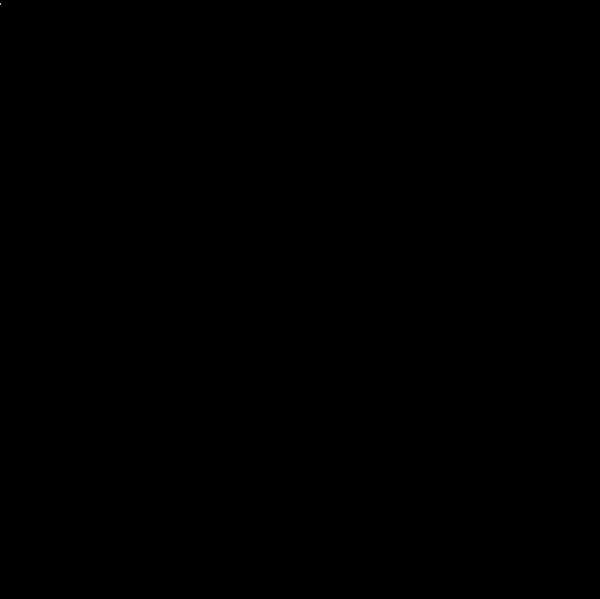

In [160]:
newIm

In [26]:
scale = list(tmp.obs["S17_pseudotime"])

In [27]:
test = sorted(range(len(scale)),key=scale.__getitem__)

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from celluloid import Camera
fig, a = plt.subplots()
camera = Camera(fig)

for j in range(0,len(test)+75,5):
    position = test[:j]
    
    plot = a.scatter(tmp.obs["imagecol"][position], tmp.obs["imagerow"][position], edgecolor="none", alpha=1,s=6,marker="o",
               vmin=min(scale), vmax=max(scale),cmap=plt.get_cmap("cool"),c=np.array(scale)[position])
    a.imshow(data.uns["tissue_img"],alpha=1, zorder=-1,)
    a.axis('off')

    camera.snap()
animation = camera.animate()    

In [29]:
from IPython.display import HTML

In [30]:
HTML(animation.to_html5_video())

In [164]:
animation.save('animation.mp4')

In [166]:

import ffmpy
ff = ffmpy.FFmpeg(
	inputs = {"/home/d.pham/UQ/ST/Working/stLearn/animation.mp4" : None},
	outputs = {"celluloid2.gif" : None},)
 
ff.run()

(None, None)

In [24]:
tmp = data.uns['subcluster_[20, 16, 8, 39, 37, 25, 30, 17, 9, 32, 38, 5, 40]_adata']

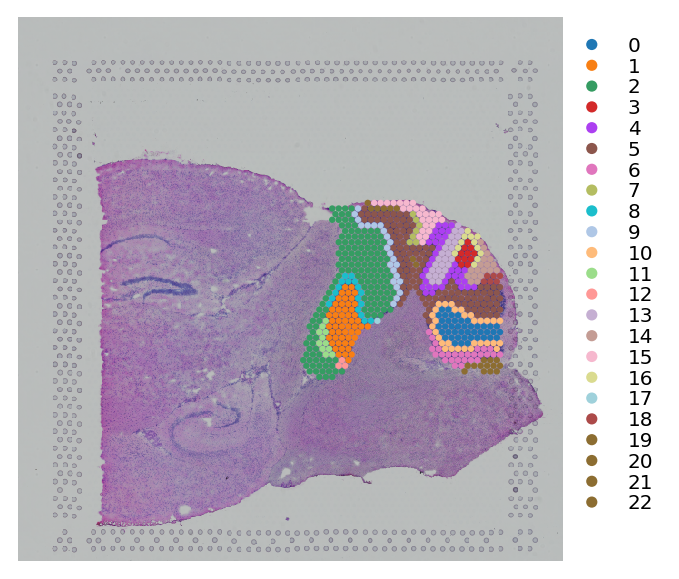

In [12]:
st.pl.cluster_plot(tmp,use_label="sub_cluster_labels")

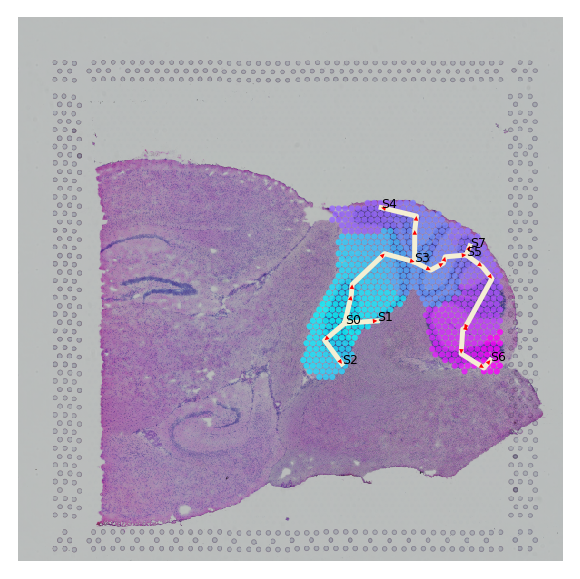

In [28]:
st.pl.trajectory.sublocal_plot(data,subcluster=sub,route="S0",show_root=True)

In [17]:
input_data = tmp.obs[["imagecol","imagerow"]].values

In [18]:
epg = tmp.uns["pseudotimespace"]['epg']

In [19]:
import networkx as nx
import pandas as pd
import numpy as np

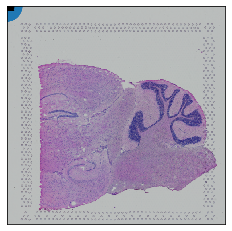

In [20]:
%matplotlib inline 
# nodes
import matplotlib.pyplot as plt

fig, a = plt.subplots()
nx.draw_networkx(epg, node_size=700)
a.imshow(tmp.uns["tissue_img"],alpha=1, zorder=-1,)

In [21]:
from sklearn.neighbors import NearestCentroid
from sklearn.metrics.pairwise import pairwise_distances

In [22]:
coor = tmp.obs[["imagecol","imagerow"]]

tmp.obs["epg_cluster"] = tmp.obs["sub_cluster_labels"]

clf = NearestCentroid()
clf.fit(coor, tmp.obs["epg_cluster"])

centroids = clf.centroids_
tmp.uns["pseudotimespace"] = {}

tmp.uns["pseudotimespace"].update({"epg_centroids": centroids})
init_nodes_pos = centroids
epg_nodes_pos = init_nodes_pos
D=pairwise_distances(epg_nodes_pos)
G=nx.from_numpy_matrix(D)
mst=nx.minimum_spanning_tree(G)

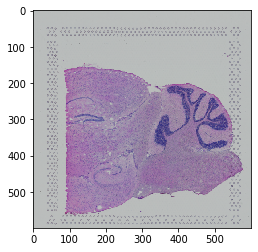

In [23]:
%matplotlib inline 
# nodes
import matplotlib.pyplot as plt

fig, a = plt.subplots()

a.imshow(tmp.uns["tissue_img"],alpha=1, zorder=-1,)

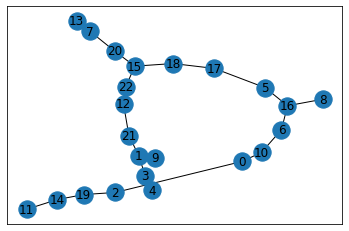

In [24]:
nx.draw_networkx(mst)

In [25]:
import numpy as np
epg_edges = np.array(mst.edges())
epg=nx.Graph()
epg.add_nodes_from(range(epg_nodes_pos.shape[0]))
epg.add_edges_from(epg_edges)
dict_nodes_pos = {i:x for i,x in enumerate(epg_nodes_pos)}
nx.set_node_attributes(epg,values=dict_nodes_pos,name='pos')

In [26]:
from stlearn.spatials.trajectory.extra import *

In [27]:

dict_branches = extract_branches(epg)
flat_tree = construct_flat_tree(dict_branches)

nx.set_node_attributes(flat_tree,values={x:dict_nodes_pos[x] for x in flat_tree.nodes()},name='pos')

In [28]:
tmp.uns["pseudotimespace"].update({'epg': deepcopy(epg)})
tmp.uns["pseudotimespace"].update({'flat_tree': deepcopy(flat_tree)})
tmp.uns["pseudotimespace"].update({'seed_epg': deepcopy(epg)})
tmp.uns["pseudotimespace"].update({'seed_flat_tree': deepcopy(flat_tree)})


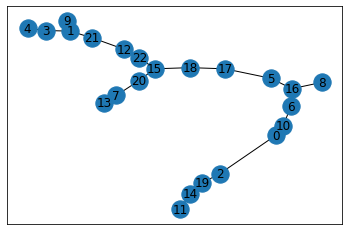

In [183]:
nx.draw_networkx(mst)

In [177]:
epg.get_edge_data(0,10)

{}

In [30]:
pos=nx.spring_layout(epg)

In [195]:
nx.set_node_attributes(mst,values={x:dict_nodes_pos[x] for x in mst.nodes()},name='pos')

In [212]:
dict_nodes_pos

{0: array([491.3777475567, 342.6097821042]),
 1: array([359.4664450017, 336.5796592673]),
 2: array([489.595813222, 343.003727415]),
 3: array([337.3744401396, 355.197942327 ]),
 4: array([356.437185039, 381.273674392]),
 5: array([470.2120584277, 263.3018990186]),
 6: array([510.9007569611, 274.0332819258]),
 7: array([438.6204252762, 218.4304297512]),
 8: array([497.4698903463, 251.3425183797]),
 9: array([395.52496558 , 333.821005545]),
 10: array([521.7642110128, 287.452674071 ]),
 11: array([519.9827996143, 377.142865352 ]),
 12: array([367.7409718599, 293.7756584533]),
 13: array([399.6988038808, 209.070572537 ]),
 14: array([512.8760868951, 385.817564336 ]),
 15: array([436.4457926325, 268.864033391 ]),
 16: array([493.4814690422, 261.27367178  ]),
 17: array([468.152469652 , 270.3342752927]),
 18: array([454.2104229675, 278.0494897011]),
 19: array([487.7261532821, 370.0325190507]),
 20: array([436.7002799751, 233.9660734477]),
 21: array([366.6821989301, 306.1688838537]),
 22:

In [202]:
flat_tree.

NodeView((1, 4, 8, 9, 11, 13, 15, 16))

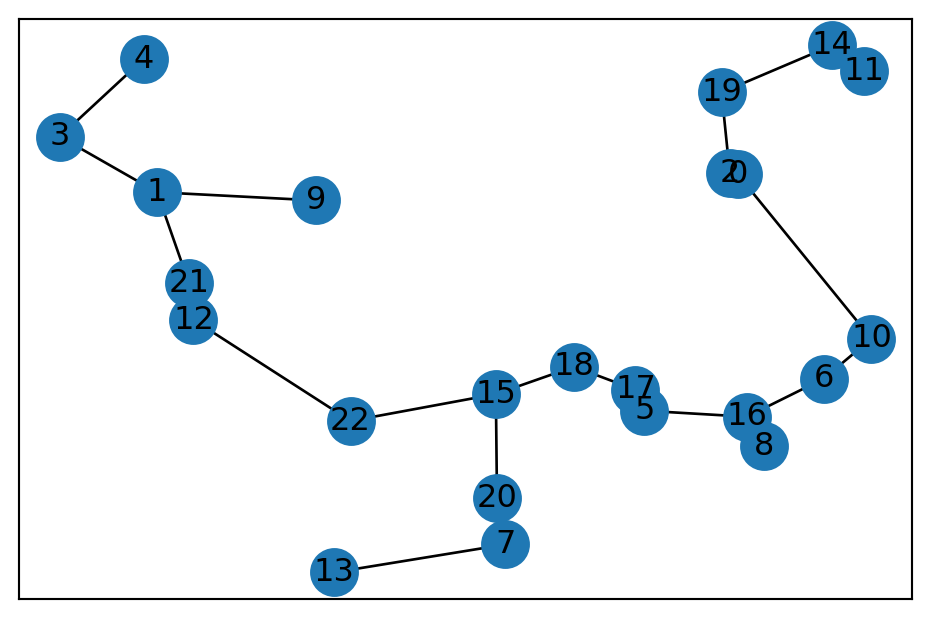

In [210]:
nx.draw_networkx(mst,pos=nx.get_node_attributes(mst,'pos'))

In [203]:
dict_nodes_pos = nx.get_node_attributes(mst,'pos')

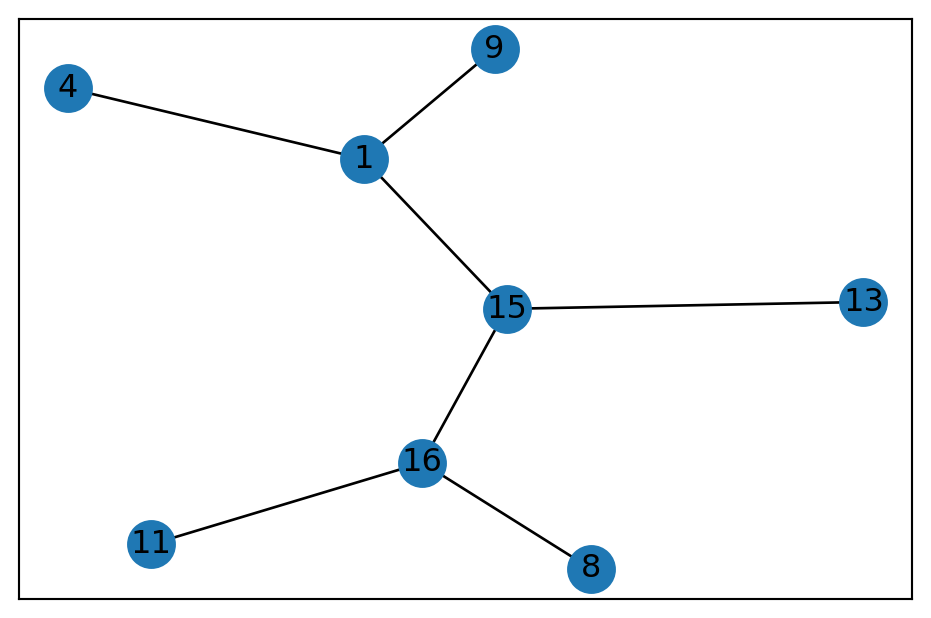

In [188]:
nx.draw_networkx(flat_tree)

In [167]:
new_pos = {}
for i,j in pos.items():
    new_pos[i] = np.exp(j)
    

In [59]:
s = tmp.obs[tmp.obs["sub_cluster_labels"] == "0"][["imagecol","imagerow"]].values

In [163]:
tissue_space = {}
for i,j in new_pos.items():
    coor_list = []
    for k in tmp.obs[tmp.obs["sub_cluster_labels"] == str(i)][["imagecol","imagerow"]].values:
        
        coor_list.append(np.multiply(k,j).tolist())
    tissue_space[i] = coor_list

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

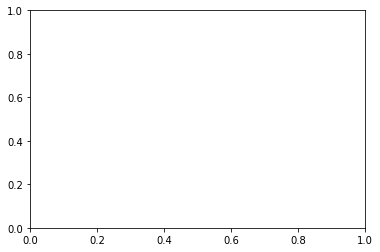

In [110]:
fig,a = plt.subplots()
a.scatter()

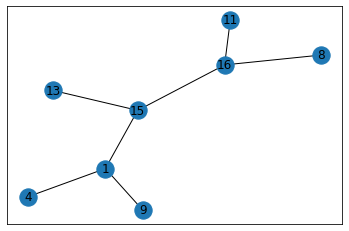

In [111]:
nx.draw_networkx(flat_tree)

In [86]:
epg.edges([1])

EdgeDataView([(1, 3), (1, 21), (1, 9)])

In [89]:
tmp.obs["node"].unique()

array([19, 12,  3, 16, 18, 22,  6, 20, 10, 21,  4,  2,  0, 13,  1,  5,  9,
       17, 15, 11,  8,  7, 14])

In [219]:
data

AnnData object with n_obs × n_vars = 3293 × 18337 
    obs: 'imagerow', 'imagecol', 'sum_counts', 'louvain', 'sub_cluster_labels', 'dpt_pseudotime'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'tissue_img', 'log1p', 'pca', 'neighbors', 'umap', 'louvain', 'paga', 'louvain_sizes', 'split_node', 'global_graph', 'centroid_dict', 'iroot', 'diffmap_evals', 'subcluster_[20, 16, 8, 39, 37, 25, 30, 17, 9, 32, 38, 5, 40]_pts', 'subcluster_[20, 16, 8, 39, 37, 25, 30, 17, 9, 32, 38, 5, 40]_adata'
    obsm: 'filtered_counts', 'X_pca', 'X_umap', 'X_umap_disk', 'X_diffmap'
    varm: 'PCs'

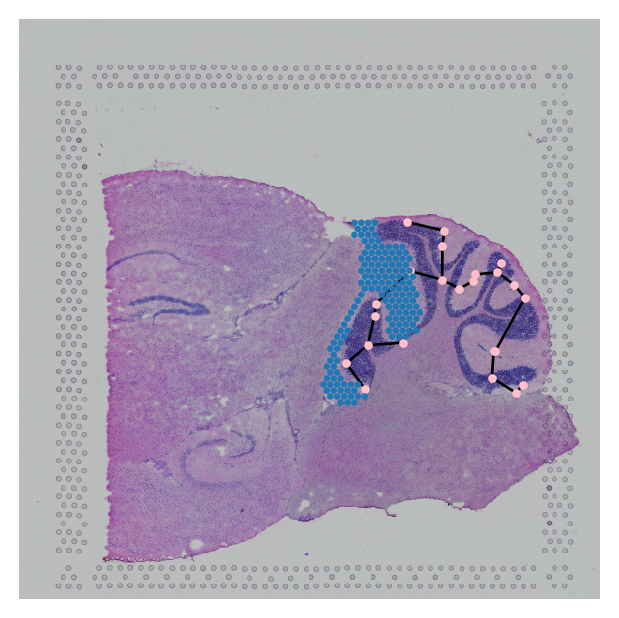

In [225]:
list_cluster = [8,11,5]
import matplotlib.pyplot as plt
# Get query clusters
plt.rcParams['figure.dpi'] = 192
command = []
for i in list_cluster:
    command.append("louvain" + ' == "' + str(i) + '"')
#tmp = data.obs.query(" or ".join(command))
tmp2 = tmp.obs
tmp2 = tmp2[tmp2["node"]==2]
fig, a = plt.subplots()

nx.draw_networkx(mst,pos=nx.get_node_attributes(mst,'pos'),node_size = 5, node_color="pink",with_labels=False)

a.scatter(tmp2["imagecol"], tmp2["imagerow"], edgecolor="none", alpha=1,s=6,marker="o",zorder=100)
a.imshow(data.uns["tissue_img"])
a.axis('off')
a.set_title
plt.show()

In [251]:


def new_coordinates_2(point_one, point_two):

    '''
    Based on "The intercept theorem", also known as "Thales' theorem"
    https://en.wikipedia.org/wiki/Intercept_theorem
    '''

    dx = (point_two[0] - point_one[0])
    dy = (point_two[1] - point_one[1])

    x_a = point_one[0] - dx*0.5
    y_b = point_one[1] - dy*0.5

    return (round(x_a), round(y_b))


In [ ]:
new_coordinates

In [235]:
tmp2[tmp2["node"]=="10"]

Empty DataFrame
Columns: [imagerow, imagecol, sum_counts, louvain, sub_cluster_labels, epg_cluster, node, branch_id, branch_id_alias, branch_lam, branch_dist, S0_pseudotime, S2_pseudotime, S7_pseudotime, S1_pseudotime, S6_pseudotime, S4_pseudotime, S3_pseudotime, S5_pseudotime]
Index: []

In [243]:
tmp2[["imagerow","imagecol"]].values[0:2]

array([[358.554224672, 317.349404498],
       [370.946651792, 324.423414979]])

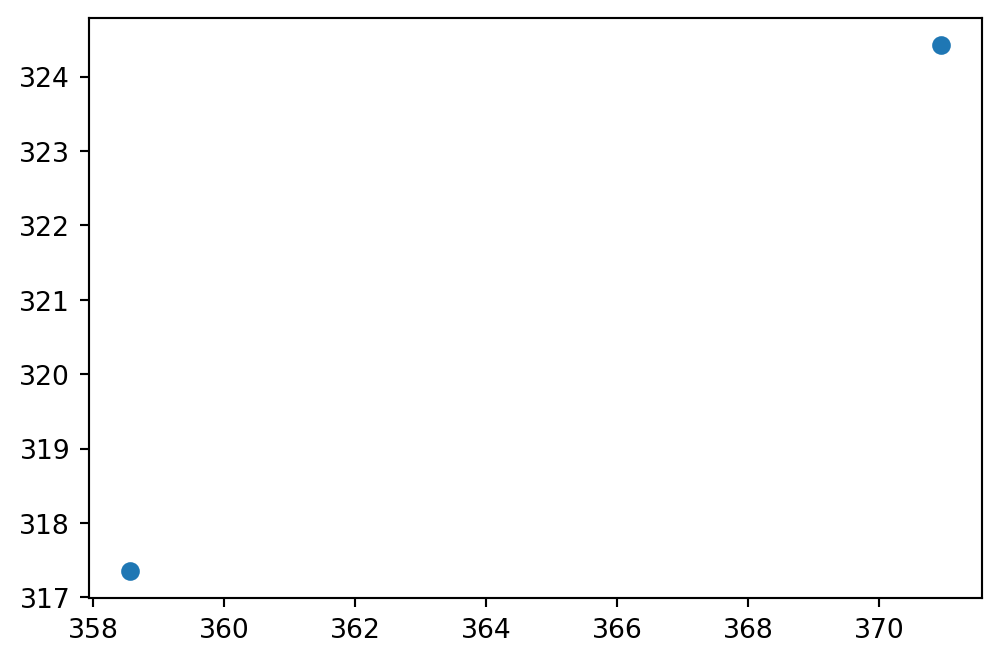

In [244]:
plt.scatter(tmp2[["imagerow","imagecol"]].values[0:2][:,0],tmp2[["imagerow","imagecol"]].values[0:2][:,1])

In [252]:
new_coordinates_2(tmp2[["imagerow","imagecol"]].values[0:2][0],tmp2[["imagerow","imagecol"]].values[0:2][1])

(352.0, 314.0)

In [255]:
tmp.obs

imagerow    imagecol  sum_counts louvain  \
AAACCCGAACGAAATC-1  358.554225  488.003453     18235.0       0   
AAACGAGACGGTTGAT-1  296.695359  360.000008     14701.0       1   
AAACTGCTGGCTCCAA-1  358.554225  317.349404     15192.0       0   
AAATAAGGTAGTGCCC-1  271.962140  488.003453     16589.0       1   
AAATACCTATAAGCAT-1  370.946652  324.423415     15100.0       0   
...                        ...         ...         ...     ...   
TTGGCGATCCGAATAT-1  296.695359  509.328755      6075.0       1   
TTGGTATGGCTTGTGT-1  284.354567  495.077463      9972.0       0   
TTGGTTCGCTCAAAGG-1  321.480214  523.528411      5622.0       1   
TTGTAAGGCCAGTTGG-1  247.228921  367.125653      6083.0       0   
TTGTTGTGTGTCAAGA-1  271.962140  352.874362     11807.0       0   

                   sub_cluster_labels epg_cluster  node branch_id  \
AAACCCGAACGAAATC-1                  0           0     0  (11, 16)   
AAACGAGACGGTTGAT-1                  1           1     1   (1, 15)   
AAACTGCTGGCTCCAA-1                  2           2     2    (4, 1)   
AAATAAGGTAGTGCCC-1                  3           3     3  (16, 15)   
AAATACCTATAAGCAT-1                  2           2     2    (4, 1)   
...                               ...         ...   ...       ...   
TTGGCGATCCGAATAT-1                  5           5     5  (11, 16)   
TTGGTATGGCTTGTGT-1                 14          14    14  (11, 16)   
TTGGTTCGCTCAAAGG-1                  5           5     5  (11, 16)   
TTGTAAGGCCAGTTGG-1                  2           2     2   (1, 15)   
TTGTTGTGTGTCAAGA-1                  2           2     2   (1, 15)   

                   branch_id_alias  branch_lam  branch_dist  S0_pseudotime  \
AAACCCGAACGAAATC-1        (S6, S5)   52.377367     0.515456     313.049064   
AAACGAGACGGTTGAT-1        (S0, S3)   40.125460     7.464339      40.125460   
AAACTGCTGGCTCCAA-1        (S2, S0)   32.300651    20.304351      28.891126   
AAATAAGGTAGTGCCC-1        (S5, S3)    6.385443    10.172420     187.383997   
AAATACCTATAAGCAT-1        (S2, S0)   27.230256    19.749481      33.961520   
...                            ...         ...          ...            ...   
TTGGCGATCCGAATAT-1        (S6, S5)  118.703047     6.432106     246.723384   
TTGGTATGGCTTGTGT-1        (S6, S5)  156.730363    17.676841     208.696068   
TTGGTTCGCTCAAAGG-1        (S6, S5)  103.846231    17.964498     261.580200   
TTGTAAGGCCAGTTGG-1        (S0, S3)   75.311501    34.165459      75.311501   
TTGTTGTGTGTCAAGA-1        (S0, S3)   47.943125    26.053526      47.943125   

                    S2_pseudotime  S7_pseudotime  S1_pseudotime  \
AAACCCGAACGAAATC-1     374.240841     129.981741     349.212956   
AAACGAGACGGTTGAT-1     101.317237     164.346097      76.289352   
AAACTGCTGGCTCCAA-1      32.300651     233.362683      65.055018   
AAATAAGGTAGTGCCC-1     248.575774      17.087560     223.547889   
AAATACCTATAAGCAT-1      27.230256     238.433077      70.125412   
...                           ...            ...            ...   
TTGGCGATCCGAATAT-1     307.915161      63.656061     282.887276   
TTGGTATGGCTTGTGT-1     269.887845      25.628745     244.859960   
TTGGTTCGCTCAAAGG-1     322.771976      78.512877     297.744092   
TTGTAAGGCCAGTTGG-1     136.503278     129.160056     111.475393   
TTGTTGTGTGTCAAGA-1     109.134902     156.528432      84.107017   

                    S6_pseudotime  S4_pseudotime  S3_pseudotime  S5_pseudotime  
AAACCCGAACGAAATC-1      52.377367     276.482277     185.898301     119.279624  
AAACGAGACGGTTGAT-1     325.300971     177.609277      87.025302     153.643980  
AAACTGCTGGCTCCAA-1     394.317557     246.625863     156.041888     222.660566  
AAATAAGGTAGTGCCC-1     178.042433     150.817210      60.233235       6.385443  
AAATACCTATAAGCAT-1     399.387951     251.696258     161.112283     227.730960  
...                           ...            ...            ...            ...  
TTGGCGATCCGAATAT-1     118.703047     210.156597     119.572621      52.953944  
TTGGTATGGC

In [260]:
test = tmp.obs[(tmp.obs["sub_cluster_labels"] == "0") | (tmp.obs["sub_cluster_labels"] == "1")]

In [266]:
tmp

AnnData object with n_obs × n_vars = 650 × 18337 
    obs: 'imagerow', 'imagecol', 'sum_counts', 'louvain', 'sub_cluster_labels', 'epg_cluster', 'node', 'branch_id', 'branch_id_alias', 'branch_lam', 'branch_dist', 'S0_pseudotime', 'S2_pseudotime', 'S7_pseudotime', 'S1_pseudotime', 'S6_pseudotime', 'S4_pseudotime', 'S3_pseudotime', 'S5_pseudotime'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'tissue_img', 'log1p', 'pca', 'neighbors', 'umap', 'louvain', 'louvain_sizes', 'split_node', 'global_graph', 'centroid_dict', 'iroot', 'diffmap_evals', 'pseudotimespace'
    obsm: 'filtered_counts', 'X_pca', 'X_umap', 'X_umap_disk', 'X_diffmap'
    varm: 'PCs'

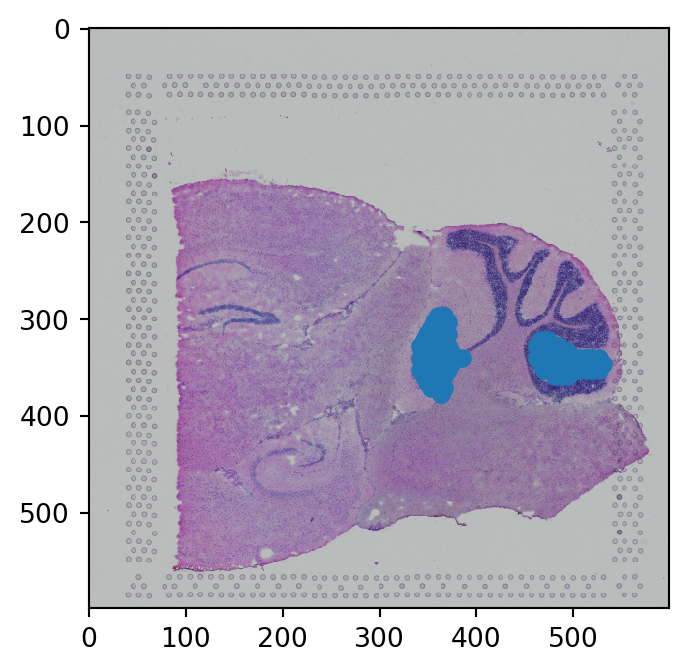

In [272]:
plt.scatter(test[["imagecol","imagerow"]].values[:,0],test[["imagecol","imagerow"]].values[:,1])
plt.imshow(tmp.uns["tissue_img"])

In [19]:
flat_tree = tmp.uns["pseudotimespace"]['flat_tree']

In [198]:
import networkx as nx
dict_edge_len = nx.get_edge_attributes(flat_tree,'len')

In [201]:
flat_tree.nodes

NodeView((0, 2, 5, 7, 9, 12, 15, 16, 17, 18, 19, 21, 23, 24, 25, 26, 27, 28, 35))